<a href="https://colab.research.google.com/github/JVMA0111/Data_Science_Projects/blob/main/Dados_Covid_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Análise exploratória

In [31]:
import pandas as pd
dados = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/03-09-2023.csv')
dados.isna().sum()

FIPS                    748
Admin2                  744
Province_State          179
Country_Region            0
Last_Update               0
Lat                      91
Long_                    91
Confirmed                 0
Deaths                    0
Recovered              4016
Active                 4016
Combined_Key              0
Incident_Rate            94
Case_Fatality_Ratio      42
dtype: int64

In [32]:
dados = dados.drop(columns = ['FIPS', 'Admin2', 'Lat', 'Long_', 'Recovered', 'Active', 'Combined_Key'])
dados

,Province_State,Country_Region,Last_Update,Confirmed,Deaths,Incident_Rate,Case_Fatality_Ratio
0,NaN,Afghanistan,2023-03-10 04:21:03,209451,7896,538.042451,3.769855
1,NaN,Albania,2023-03-10 04:21:03,334457,3598,11621.968170,1.075774
2,NaN,Algeria,2023-03-10 04:21:03,271496,6881,619.132366,2.534476
3,NaN,Andorra,2023-03-10 04:21:03,47890,165,61981.492267,0.344540
4,NaN,Angola,2023-03-10 04:21:03,105288,1933,320.352770,1.835917
...,...,...,...,...,...,...,...
4011,NaN,West Bank and Gaza,2023-03-10 04:21:03,703228,5708,13784.956961,0.811686
4012,NaN,Winter Olympics 2022,2023-03-10 04:21:03,535,0,NaN,0.000000
4013,NaN,Yemen,2023-03-10 04:21:03,11945,2159,40.048994,18.074508
4014,NaN,Zambia,2023-03-10 04:21:03,343135,4057,1866.491630,1.182333


In [16]:
dados.describe()

,Confirmed,Deaths,Incident_Rate,Case_Fatality_Ratio
count,4.016000e+03,4016.000000,3922.000000,3974.000000
mean,1.684687e+05,1713.596614,28539.052104,3.872085
std,1.067218e+06,8865.157745,10774.908530,124.151911
min,0.000000e+00,0.000000,0.000000,0.000000
25%,3.836250e+03,48.000000,24159.998451,0.893031
50%,1.081150e+04,135.000000,29528.828111,1.283812
75%,4.684225e+04,481.250000,34185.676602,1.731697
max,3.861851e+07,186138.000000,238461.538462,7674.242424


In [34]:
dados.fillna('Informação não encontrada', inplace = True)
dados.columns = ['Província', 'País', 'Última Atualização', 'Casos confirmados', 'Mortes', 'Razão de incidência', 'Razão de fatalidade']
dados

,Província,País,Última Atualização,Casos confirmados,Mortes,Razão de incidência,Razão de fatalidade
0,Informação não encontrada,Afghanistan,2023-03-10 04:21:03,209451,7896,538.042451,3.769855
1,Informação não encontrada,Albania,2023-03-10 04:21:03,334457,3598,11621.96817,1.075774
2,Informação não encontrada,Algeria,2023-03-10 04:21:03,271496,6881,619.132366,2.534476
3,Informação não encontrada,Andorra,2023-03-10 04:21:03,47890,165,61981.492267,0.34454
4,Informação não encontrada,Angola,2023-03-10 04:21:03,105288,1933,320.35277,1.835917
...,...,...,...,...,...,...,...
4011,Informação não encontrada,West Bank and Gaza,2023-03-10 04:21:03,703228,5708,13784.956961,0.811686
4012,Informação não encontrada,Winter Olympics 2022,2023-03-10 04:21:03,535,0,Informação não encontrada,0.0
4013,Informação não encontrada,Yemen,2023-03-10 04:21:03,11945,2159,40.048994,18.074508
4014,Informação não encontrada,Zambia,2023-03-10 04:21:03,343135,4057,1866.49163,1.182333


In [65]:
dados.drop_duplicates(inplace = True)

In [73]:
pd.to_datetime(dados['Última Atualização'])
print("Os dados coletados são de", dados['Última Atualização'].min(), "até", dados['Última Atualização'].max())

Os dados coletados são de 2020-08-04 02:27:56 até 2023-03-10 04:21:03


#Quais países estão enfrentando o maior número de casos confirmados de covid-19?

In [80]:
casos_confirmados = dados.groupby('País')['Casos confirmados'].sum()
casos_confirmados = casos_confirmados.reset_index()
casos_confirmados.sort_values('Casos confirmados', ascending = False, inplace = True)
casos_confirmados

,País,Casos confirmados
186,US,103802702
80,India,44690738
63,France,39866718
67,Germany,38249060
24,Brazil,37076053
...,...,...
197,Winter Olympics 2022,535
76,Holy See,29
5,Antarctica,11
107,MS Zaandam,9


In [81]:
#Valores totais e ordenados dos 10 países com maior número de casos confirmados de covid19
os_10_mais_acometidos = casos_confirmados.head(10)
os_10_mais_acometidos

,País,Casos confirmados
186,US,103802702
80,India,44690738
63,France,39866718
67,Germany,38249060
24,Brazil,37076053
88,Japan,33320438
94,"Korea, South",30615522
86,Italy,25603510
190,United Kingdom,24658705
147,Russia,22075858


In [82]:
total = os_10_mais_acometidos['Casos confirmados'].sum()
os_10_mais_acometidos['Percentual (%)'] = (os_10_mais_acometidos['Casos confirmados']/total * 100).round(2)
os_10_mais_acometidos

<ipython-input-82-eba85cd2c4e8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  os_10_mais_acometidos['Percentual (%)'] = (os_10_mais_acometidos['Casos confirmados']/total * 100).round(2)


,País,Casos confirmados,Percentual (%)
186,US,103802702,25.95
80,India,44690738,11.17
63,France,39866718,9.97
67,Germany,38249060,9.56
24,Brazil,37076053,9.27
88,Japan,33320438,8.33
94,"Korea, South",30615522,7.65
86,Italy,25603510,6.40
190,United Kingdom,24658705,6.17
147,Russia,22075858,5.52


Text(0.5, 1.0, 'Países com mais casos confirmados')

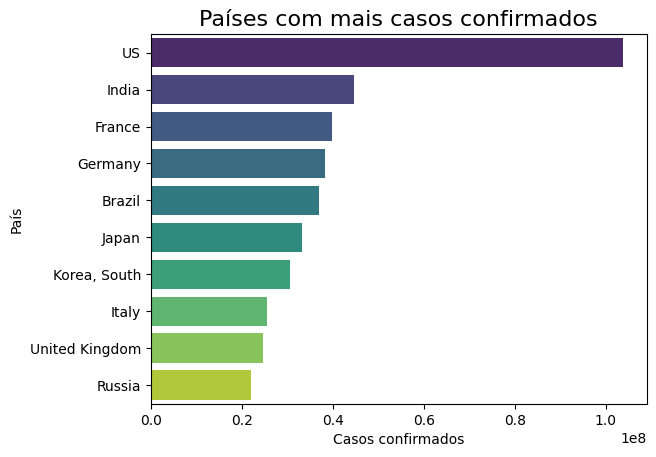

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(data = os_10_mais_acometidos, x = 'Casos confirmados', y = 'País', palette = 'viridis')
plt.title('Países com mais casos confirmados', fontsize = 16)

<ipython-input-74-95ae4b096aac>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(os_10_mais_acometidos['Casos confirmados'])


Text(0.5, 1.0, 'Análise de casos confirmados (08/2020 - 03/2023)')

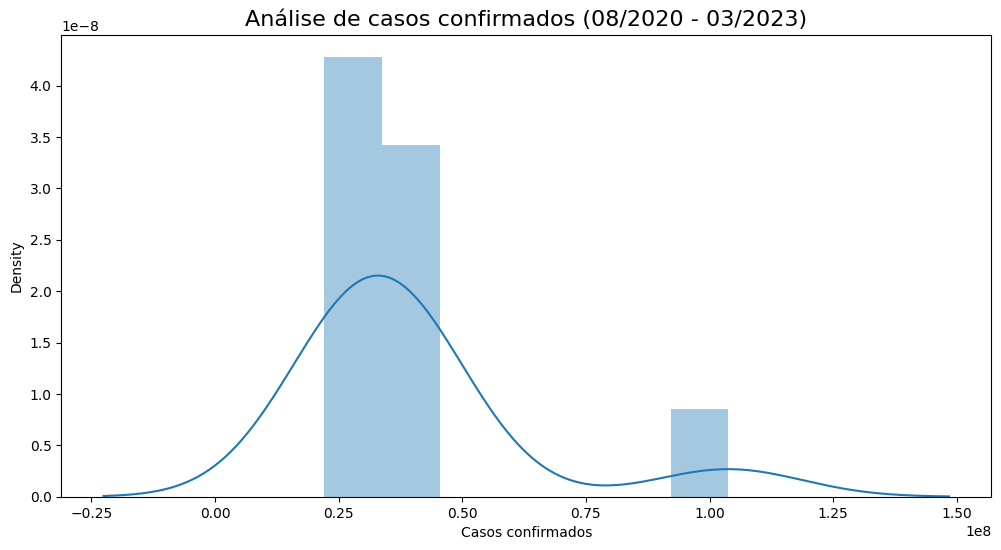

In [74]:
ax = sns.distplot(os_10_mais_acometidos['Casos confirmados'])
ax.figure.set_size_inches(12,6)
ax.set_title('Análise de casos confirmados (08/2020 - 03/2023)', fontsize = 16)

<Figure size 2000x1000 with 0 Axes>

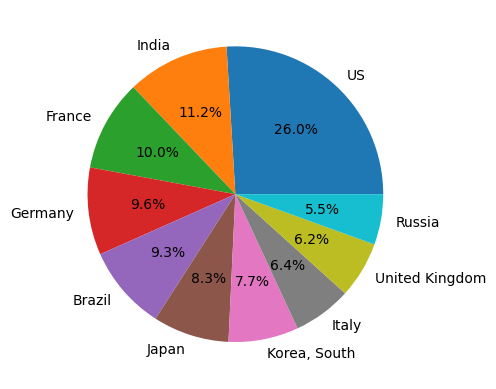

<Figure size 2000x1000 with 0 Axes>

In [75]:
plt.pie(os_10_mais_acometidos['Percentual (%)'], labels = os_10_mais_acometidos['País'], autopct='%1.1f%%')
plt.figure(figsize = [20,10])

#### A análise do segundo gráfico evidencia uma assimetria à direita para o conjunto de dados, isso ocorre devido ao distanciamento dos casos confirmados pelos Estados Unidos em comparação com outros países. Sendo os EUA portanto, um dos grandes centros e principais afetados pela pandemia de Covid19. Outra informação importante que ilustra a grande quantidade de casos representada pelos EUA é o seu percentual de 26%.

In [105]:
total = casos_confirmados['Casos confirmados'].sum()
casos_confirmados['Percentual (%)'] = (casos_confirmados['Casos confirmados']/total * 100).round(2)
percentual_10_paises = casos_confirmados.head(10)['Percentual (%)'].sum()
percentual_outros = casos_confirmados['Percentual (%)'].sum() - percentual_10_paises
comparativo = pd.DataFrame(data = {percentual_outros, percentual_10_paises}, index = ['Resto do mundo', '10 primeiros países'])
comparativo = comparativo.reset_index()
comparativo.columns = ['Lugar', 'Percentual (%)']
comparativo

,Lugar,Percentual (%)
0,Resto do mundo,40.79
1,10 primeiros países,59.10


<Figure size 2000x1000 with 0 Axes>

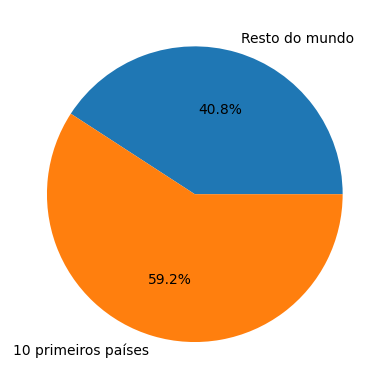

<Figure size 2000x1000 with 0 Axes>

In [107]:
plt.pie(comparativo['Percentual (%)'], labels = comparativo['Lugar'], autopct='%1.1f%%')
plt.figure(figsize = [20,10])

####Vemos ainda uma importante distribuição representada pelos primeiros 10 países, que carregam 59,2% de todos os casos mundiais. O que pode levar a novos questionamentos a respeito de como estes países lidaram com a pandemia.